In [1]:
import time as t 
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop('User ID', axis=1, inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
df.duplicated().sum()

np.int64(20)

In [7]:
df = df[['Age','EstimatedSalary','Purchased']]

In [8]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [9]:
X1 = df.iloc[:,:-1]
y1 = df.iloc[:,-1]
X1.head()
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

model .add(Dense(10,activation='relu', input_dim=(X_train.shape[1])))
model .add(Dense(10,activation='relu'))
model .add(Dense(1,activation='sigmoid'))

/Users/suraj/Documents/Deep learning/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

start  =  t.time()  
history = model.fit(X_train, y_train, epochs=10, batch_size=320,validation_split=0.2)
end = t.time()
print("Time taken to train the model is ", end - start)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

start  =  t.time()  
history = model.fit(X_train, y_train, epochs=10, batch_size=1,validation_split=0.2)
end = t.time()
print("Time taken to train the model is ", end - start) 

In [15]:
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(400, 2)

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
start  =  t.time()
history = model.fit(X_scaled, y, epochs=10, batch_size=1, validation_split=0.2)
end = t.time()
print("Time taken to train the model is ", end - start)


Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7125 - loss: 0.5735 - val_accuracy: 0.4500 - val_loss: 0.6856
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.7531 - loss: 0.3887 - val_accuracy: 0.7750 - val_loss: 0.5254
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.8469 - loss: 0.3251 - val_accuracy: 0.9500 - val_loss: 0.4104
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.8719 - loss: 0.2914 - val_accuracy: 0.9500 - val_loss: 0.3395
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.8813 - loss: 0.2738 - val_accuracy: 0.9500 - val_loss: 0.3058
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.8781 - loss: 0.2652 - val_accuracy: 0.9625 - val_loss: 0.2816
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.8875 - loss: 0.2594 - val_accuracy: 0.9750 - val_loss: 0.2678
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.8844 - loss: 0.2540 - va

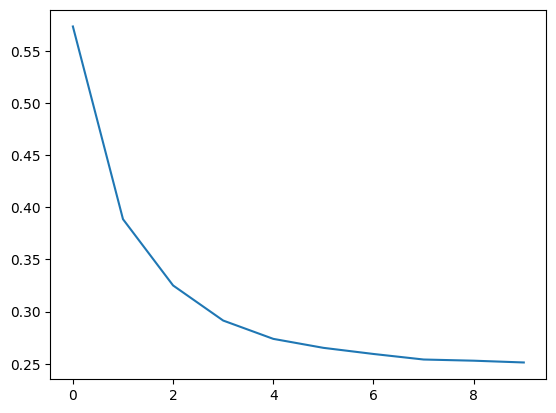

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
start  =  t.time()
history = model.fit(X_scaled, y, epochs=10, batch_size=400, validation_split=0.2)
end = t.time()
print("Time taken to train the model is ", end - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8875 - loss: 0.2453 - val_accuracy: 0.9750 - val_loss: 0.2595
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8938 - loss: 0.2451 - val_accuracy: 0.9750 - val_loss: 0.2585
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8938 - loss: 0.2449 - val_accuracy: 0.9750 - val_loss: 0.2576
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8938 - loss: 0.2447 - val_accuracy: 0.9750 - val_loss: 0.2566
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8938 - loss: 0.2445 - val_accuracy: 0.9750 - val_loss: 0.2557
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8938 - loss: 0.2443 - val_accuracy: 0.9750 - val_loss: 0.2548
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8938 - loss: 0.2441 - val_accuracy: 0.9750 - val_loss: 0.2539
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8938 - loss: 0.2440 - val_accuracy: 0.9750 - val_loss: 0.2531
Ep

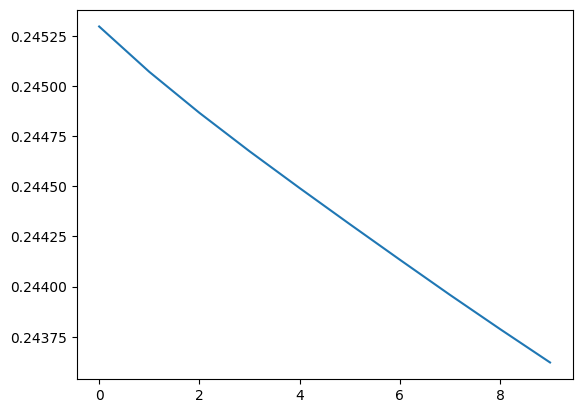

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')